# Data Aggregation with Groupby

<center><img src="../images/stock/pexels-pixabay-210182.jpg"></center>

In this lesson, we'll explore a powerful technique in Pandas called data aggregation using the `groupby()` method. 

Think of aggregation as a way to summarize and gain insights from your data by categorizing it. We'll be using the `mpg` dataset, conveniently available through the Seaborn library, to illustrate these concepts with real-world examples.

## Getting Started

### Import Libraries

First, we'll bring in the essential tools we'll need for this lesson:

```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
````



In [2]:
## Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Dataset

Next, we'll load the `mpg` dataset.

Seaborn not only excels at creating beautiful and insightful statistical plots but also offers a handy way to access several well-known datasets directly within the library. These built-in datasets are perfect for learning data analysis and practicing visualization skills without the initial step of finding and loading external files.

The `mpg` dataset contains various technical details about cars, with a focus on their fuel efficiency measured in miles per gallon.

__Understanding the Columns:__

* `mpg`: Fuel efficiency in miles per gallon.
* `cylinders`: Number of engine cylinders 
* `displacement`: Engine displacement in cubic inches
* `horsepower`: Engine horsepower 
* `weight`: Vehicle weight in pounds
* `acceleration`: Time to accelerate from 0 to 60 mph in seconds 
* `model_year`: Year the car model was released
* `origin`: Country of origin (USA, Europe, Asia)
* `name`: Car model name 

To load this dataset into our workspace, we'll use the following simple command:

```python
sns.load_dataset("mpg")
```

This line of code fetches the "mpg" dataset from Seaborn and stores it in a Pandas DataFrame.

In [3]:
## Load and Preview Dataset
mpg_df = sns.load_dataset("mpg")
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### Inspect the Dataset

Before we start grouping and aggregating, it's always a good idea to get a feel for our data. Let's use the `.info()` method on our DataFrame to get a summary of its structure.

In [4]:
## View Key Information on the Dataset
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


### Data Cleaning

As noted from the .info() output, it seems our dataset contains some missing values. 

To get a closer look at the specific rows that contain these missing values, we can create a boolean mask. This mask will identify rows where at least one column has a null value. Then, we can use this mask to select and display those rows.

In [5]:
## View Rows Containing Null Values
null_mask = mpg_df.isnull().any(axis=1)
null_rows = mpg_df[null_mask]

null_rows

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


Given the small number of rows with missing data, a straightforward approach for this lesson is to remove them. This will simplify our analysis and allow us to focus on the core concepts of `groupby()` without the complexities of handling missing values.

Let's drop the rows containing any null values using the `.dropna()` method.

In [6]:
## Drop Rows Containing Null Values
mpg_df_dropna = mpg_df.dropna(axis=0)
mpg_df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


### Data Transformation

Next, we'll modify the `name` column.

Each entry for `name` contains the make and model of the car.
Let's extract the make and place it into a new column named `make`.

In [7]:
# Create a new column 'make' by extracting the first word from 'car_name'
mpg_df_dropna["make"] = mpg_df_dropna["name"].str.split(" ", n=1, expand=True)[0]
mpg_df_dropna.head(5)

/var/folders/nw/qfc0h_7d6tx63xx9wlbq947h0000gn/T/ipykernel_5827/3543468974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpg_df_dropna["make"] = mpg_df_dropna["name"].str.split(" ", n=1, expand=True)[0]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


Now let's remove the make from the `name` column.

In [8]:
# Remove the make from the "name" column
mpg_df_dropna.loc[:, "name"] = mpg_df_dropna["name"].str.split(" ", n=1, expand=True)[1]
mpg_df_dropna.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,torino,ford


And finally, rename `name` to `model`

In [9]:
# Rename the "name" column to "model"
mpg_df_clean = mpg_df_dropna.rename(columns={"name": "model"})

mpg_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   model         390 non-null    object 
 9   make          392 non-null    object 
dtypes: float64(4), int64(3), object(3)
memory usage: 33.7+ KB


Even after splitting the name column, there's a good chance we might still have inconsistencies in how the car makes are represented. 

Typos, abbreviations, or variations in spelling can lead to different entries for the same manufacturer.

Let's examine the unique values in our newly created make column using the `.unique()` method to identify any such inconsistencies.

In [10]:
## Inspect Unique Makes
mpg_df_clean["make"].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

Let's standardize the car make entries in our make column to ensure consistent grouping. We'll use the `.replace()` method, which offers flexibility in how we define our replacements. We can replace one string at a time or use a dictionary for multiple replacements.

Based on the unique values you likely observed in the previous step, let's assume we identified some common inconsistencies like abbreviations or misspellings. We can now create a dictionary to map these variations to their standard full make names.

Here is the dictionary that we will use:

```python
replacement_dictionary = {
    "vokswagen": "volkswagen",
    "vw": "volkswagen",
    "toyouta": "toyota",
    "maxda": "mazda",
    "chevroelt": "chevrolet",
    "chevy": "chevrolet",
    "hi": "ih"  
}
```

In [11]:
# Replace Typos
replacement_dictionary = {
    "vokswagen": "volkswagen",
    "vw": "volkswagen",
    "toyouta": "toyota",
    "maxda": "mazda",
    "chevroelt": "chevrolet",
    "chevy": "chevrolet",
    "hi": "ih"  
}

mpg_df_clean['make'].replace(replacement_dictionary, inplace=True)

mpg_df_clean["make"].unique()

/var/folders/nw/qfc0h_7d6tx63xx9wlbq947h0000gn/T/ipykernel_5827/1248898781.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mpg_df_clean['make'].replace(replacement_dictionary, inplace=True)


array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'ih', 'mercury', 'opel', 'fiat', 'oldsmobile',
       'chrysler', 'mazda', 'volvo', 'renault', 'honda', 'subaru',
       'capri', 'mercedes-benz', 'cadillac', 'mercedes', 'triumph',
       'nissan'], dtype=object)

### Visualizations

Before we dive into the power of `groupby()`, let's create some basic visualizations to get a general sense of the relationships between different variables in our cleaned dataset. 

This will help us identify potential areas where grouping and aggregation might reveal interesting insights.

#### Bar Plot - Country of Origin

Let's visualize the distribution of cars in our cleaned dataset based on their country of origin using a bar plot. 

This will give us a sense of how many cars in our sample come from the USA, Europe, and Asia.

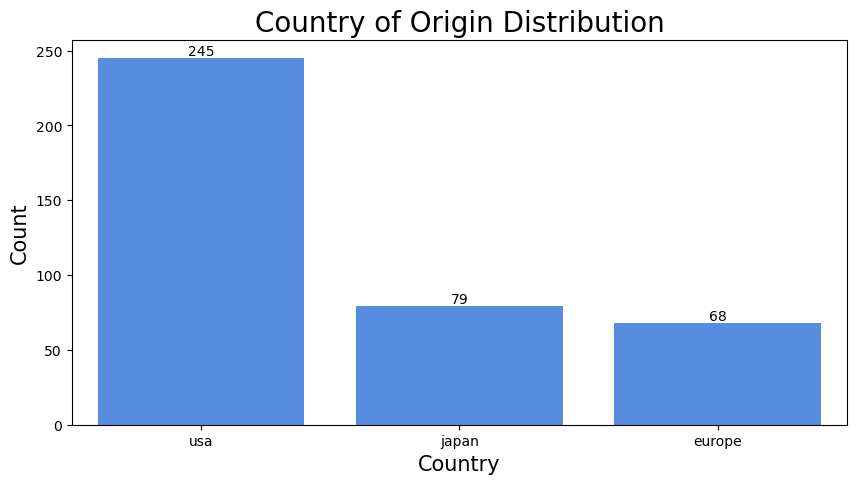

In [12]:
### Bar Plot - Country of Origin

plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'origin', data = mpg_df_clean, color = '#4287f5')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("Country of Origin Distribution", fontsize = 20)
plt.xlabel("Country", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

### Line Plot - Model Year vs. MPG

Let's explore how fuel efficiency (MPG) has trended over the different model years in our dataset using a line plot.

<Axes: title={'center': 'model year against mpg\n'}, xlabel='model year\n', ylabel='mpg\n'>

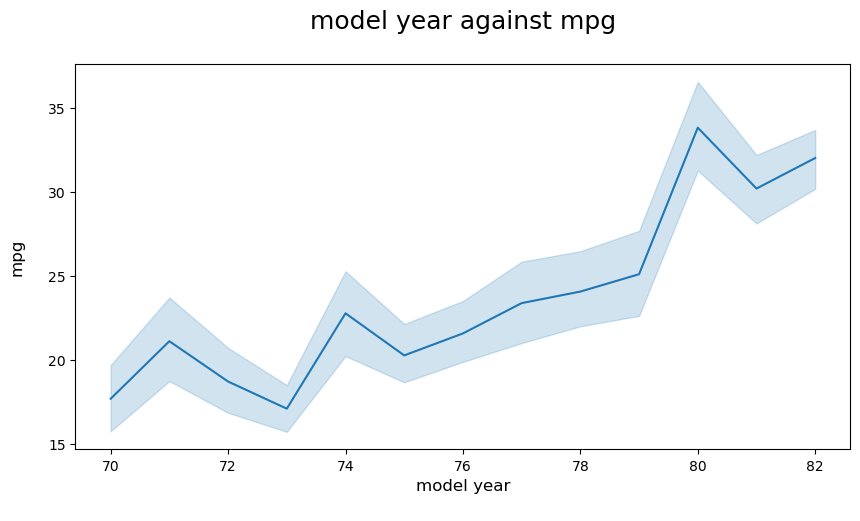

In [13]:
## Begin Visual
plt.figure(figsize=(10,5), dpi=100)
plt.title("model year against mpg\n", fontsize = 18)
plt.xlabel("model year\n", fontsize = 12)
plt.ylabel("mpg\n", fontsize = 12)
sns.lineplot(x = 'model_year', 
             y = 'mpg', 
             data = mpg_df_clean)
## End Visual

## Split-Apply-Combine: The Concept Behind Groupby

<center><img src="../images/stock/pexels-arnie-chou-304906-1877271.jpg"></center>

The `groupby()` method is based on the split-apply-combine strategy:

* __Split:__ The data is divided into groups based on one or more columns.

* __Apply:__ You apply a function (e.g., mean, sum, count) to each group independently.

* __Combine:__ The results from each group are combined into a new data structure.

## Understanding Groupby

Let's break down the `groupby()` method step by step.

* What is a Groupby Object?

    * When you apply the `groupby()` method to a DataFrame, it doesn't immediately perform calculations. 
    * Instead, it creates a DataFrameGroupBy object. 
    * This object contains information about how the data has been split into groups, but the calculations are deferred until you specify an aggregation function.

__Syntax__

The basic syntax for `groupby()` is:

```python
df.groupby(column_name)
```

* `df`: The Pandas DataFrame you want to group.

* `column_name`: The column name (or a list of column names) that you want to group the data by.

### Example: Grouping by Origin

Now, let's get to the heart of this lesson: using the `groupby()` method. 

We'll start with a simple example by grouping our DataFrame based on the `origin` column. 

This will categorize our data into three groups: cars from the USA, Europe, and Asia.

In [14]:
## Begin Example
origin_grouped = mpg_df_clean.groupby("origin")

origin_grouped

The output of `.groupby()` will be a `DataFrameGroupBy` object. 

This object signifies that the data has been successfully organized into groups based on the unique values in the `origin` column (USA, Europe, Asia). 

However, it's important to remember that this is an intermediate step. No actual calculations or aggregations have been applied to these groups yet. 

To gain meaningful insights, we need to tell Pandas what kind of operation we want to perform on each of these origin-based groups, such as calculating the mean, sum, or count of specific columns. 

The DataFrameGroupBy object provides the structure for these subsequent aggregation operations.

## Applying Aggregation Functions

<center><img src="../images/stock/pexels-padrinan-3785930.jpg"></center>

With our data now organized into groups based on the `origin` of the cars, the next powerful step is to apply aggregation functions. 

These functions allow us to calculate summary statistics for each group, providing us with valuable insights into the characteristics of cars from different regions. 

Let's explore some common aggregation functions in Pandas.

### Mean

To answer the question of which country produced the most and least fuel-efficient vehicles in our dataset, we can calculate the average MPG for each country of origin using the `.mean()` aggregation function.

Let's apply this to our group object, specifically focusing on the `mpg` column.

In [15]:
## Begin Calculation
origin_mpg_mean = origin_grouped["mpg"].mean()
origin_mpg_mean

origin
europe    27.602941
japan     30.450633
usa       20.033469
Name: mpg, dtype: float64

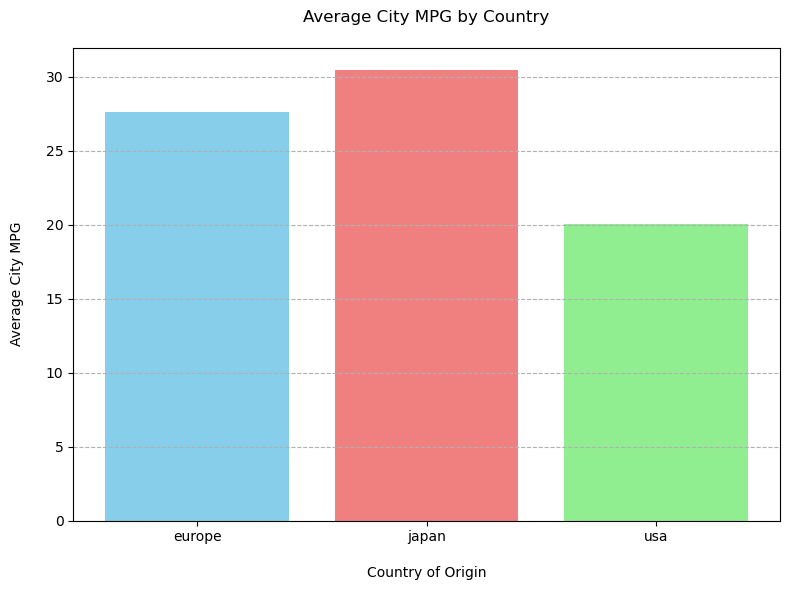

In [16]:
# Visualize Horsepower by Origin
origins = origin_mpg_mean.index
mpg_values = origin_mpg_mean.values

plt.figure(figsize=(8,6), dpi=100)
plt.bar(origins,
        mpg_values,
        color = ["skyblue",
                 "lightcoral",
                 "lightgreen"])
plt.title("Average City MPG by Country\n")
plt.xlabel("\nCountry of Origin")
plt.ylabel("Average City MPG\n")
plt.grid(axis="y", linestyle="--")
plt.tight_layout()

### Sum

To determine which country of origin produced the highest total horsepower across all its car models in the dataset, we can use the `.sum()` aggregation function after grouping by `origin`.

In [17]:
## Begin Calculation
origin_hp_sum = origin_grouped["horsepower"].sum()
origin_hp_sum

origin
europe     5478.0
japan      6307.0
usa       29167.0
Name: horsepower, dtype: float64

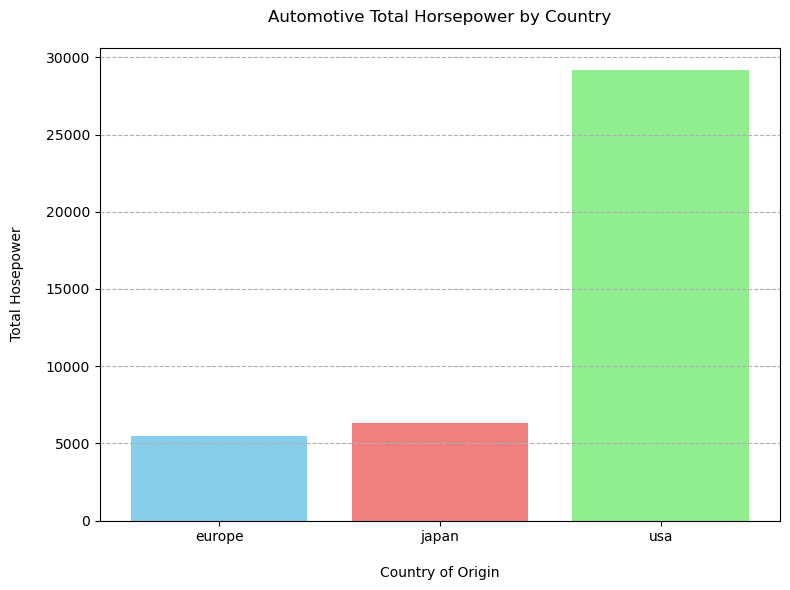

In [18]:
## Begin Visualization
origins = origin_hp_sum.index
hp_values = origin_hp_sum.values

plt.figure(figsize=(8,6), dpi=100)
plt.bar(origins,
        hp_values,
        color = ["skyblue",
                 "lightcoral",
                 "lightgreen"])
plt.title("Automotive Total Horsepower by Country\n")
plt.xlabel("\nCountry of Origin")
plt.ylabel("Total Hosepower\n")
plt.grid(axis="y", linestyle="--")
plt.tight_layout() 

### Groupby Revisited

When we use `.groupby()`, imagine sorting your entire dataset into separate bins, where each bin holds rows that share the same value in a specific column. In our case with the `mpg` dataset, we used `.groupby('origin')` to create distinct groups: one containing all American cars, another for European cars, and a third for Japanese cars.

<center> Original Data Set</center>

| mpg | cylinders | origin |
|-----|-----------|--------|
| 18  |     8     |  USA   |
| 15  |     8     |  USA   |
| 24  |     4     | Europe |
| 31  |     4     | Japan  |
| 22  |     8     |  USA   |
| 35  |     4     | Japan  |
| 28  |     4     | Europe |
| ... |     ...   |  ...   |


<center>USA Group</center>

| mpg | cylinders | origin |
|-----|-----------|--------|
| 18  |     8     |  USA   |
| 15  |     8     |  USA   |
| 22  |     8     |  USA   |
| ... |     ...   |  USA   |

<center>Europe Group</center>

| mpg | cylinders | origin |
|-----|-----------|--------|
| 24  |     4     | Europe |
| 22  |     6     | Europe |
| 28  |     4     | Europe |
| ... |     ...   | Europe |

<center>Japan Group</center>

| mpg | cylinders | origin |
|-----|-----------|--------|
| 31  |     4     | Japan  |
| 35  |     4     | Japan  |
| 32  |     4     | Japan  |
| ... |     ...   | Japan  |

         
Once these groups are formed, we can then apply aggregate functions like .mean() to each individual bin. So, when we calculated `.mean()` on the `'mpg'` column after grouping by 'origin', we effectively found the average miles per gallon within each of those origin-specific groups.

<center>The resulting Series of Average MPG</center>

| Origin |  |
|--------|-------------------|
| europe | 27.602941         |
| japan  | 30.450633         |
| usa    | 20.033469         |


This powerful tool allows us to analyze trends and differences across various categories within our data, providing valuable insights that might be hidden in the overall dataset.

### Other Useful Aggregation Functions

Here are some other commonly used aggregation functions:

* __`count().`__: Number of non-null values in each group.

* __`min().`__: Minimum value in each group.

* __`max().`__: Maximum value in each group.

* __`any().`__: Returns True if any value in the group is True.

* __`all().`__: Returns True if all values in the group are True.

* __`median.`__(): Median value of each group.

* __`std().`__: Standard deviation of each group.

## Groupby Multiple Columns

<center><img src="../images/stock/pexels-vividcafe-681335.jpg"></center>

The power of `.groupby()` extends beyond just a single column. 

You can also group your data based on the unique combinations of values from multiple columns. This allows for even more granular analysis and the creation of more specific subgroups within your data. 

When you group by multiple columns, the resulting structure will have a hierarchical index (also known as a MultiIndex), reflecting the different levels of grouping you've applied.

Let's build upon our previous example and perform a more detailed analysis. We'll group our DataFrame by both `make` and `model_year`, and then calculate the average MPG for each unique combination of these two factors. 

This will allow us to see how the fuel efficiency of specific car manufacturers has changed over the years.

In [19]:
# Group by Make and Model Year
make_year_grouped = mpg_df_clean.groupby(["make", "model_year"])
make_year_grouped

In [20]:
# Get Average MPG
make_year_mpg_mean = make_year_grouped['mpg'].mean()
make_year_mpg_mean.head(25)

make   model_year
amc    70            17.500000
       71            18.333333
       72            16.000000
       73            15.750000
       74            16.333333
       75            18.000000
       76            18.500000
       78            18.750000
       79            23.800000
       80            24.300000
audi   70            24.000000
       73            20.000000
       74            29.000000
       75            23.000000
       78            20.300000
       80            35.350000
bmw    70            26.000000
       77            21.500000
buick  70            14.500000
       72            13.000000
       73            12.500000
       74            13.000000
       75            19.000000
       77            25.250000
       78            19.150000
Name: mpg, dtype: float64

### MultiIndex
When you group a DataFrame by multiple columns, the resulting Series or DataFrame often has a MultiIndex. This means that the index itself has multiple levels, corresponding to the columns you used in the `.groupby()` operation.

In the case of grouping by `make` and `model_year`, the resulting Series from calculating the mean MPG would have a MultiIndex where the first level is `make` and the second level is `model_year`.

To access a specific value in a Series or DataFrame with a MultiIndex, you can use `.loc[]` with a tuple containing the values for each level of the index. 

The order in the tuple corresponds to the order of the columns you used in the `groupby()` function.

In [21]:
## Accessing MultiIndex Elements
make_year_mpg_mean.loc[('honda', 80)]

np.float64(38.5)

### Resetting the Index

As we've seen, grouping by multiple columns creates a hierarchical index (MultiIndex) in the resulting Pandas Series or DataFrame. While MultiIndexes are powerful for advanced data manipulation, sometimes it's more convenient to have the grouping columns (`make` and `model_year` in our previous example) as regular, flat columns in the DataFrame.

To achieve this, we can use the `.reset_index()` method on the Series or DataFrame that results from the `.groupby()` operation. This will convert the levels of the MultiIndex into new columns with their respective names, and a new default integer index will be assigned to the DataFrame.

Let's apply `.reset_index()` to our MultiIndex Series:

In [22]:
## Reset the Index
make_year_mpg_mean = make_year_mpg_mean.reset_index()
make_year_mpg_mean

,make,model_year,mpg
0,amc,70,17.500000
1,amc,71,18.333333
2,amc,72,16.000000
3,amc,73,15.750000
4,amc,74,16.333333
...,...,...,...
201,volvo,73,19.000000
202,volvo,75,22.000000
203,volvo,76,20.000000
204,volvo,78,17.000000


The `.reset_index()` operation transforms the MultiIndex Series into a Pandas DataFrame. 

The `make` and `model_year` that were previously part of the hierarchical index are now converted into regular columns within this DataFrame. 

A new, simple numerical index is automatically assigned to the rows, and the average MPG values are stored in a column named `mpg`. This DataFrame format is often more convenient for subsequent analysis and visualization, especially when tools expect the grouping variables as distinct columns.

## Applying Multiple Aggregation Functions with `.agg()`

<center><img src="../images/stock/pexels-lina-mamone-661542-1472612.jpg"></center>

While functions like `.mean()` and `.sum()` allow us to calculate a single statistic for each group, Pandas provides the versatile `.agg()` method to apply multiple aggregation functions simultaneously. This can be incredibly useful for getting a more comprehensive summary of your grouped data in one go.

The `.agg()` method accepts a variety of arguments:

* A single aggregation function (as we've seen with `.mean()` and `.sum()`): This works just like calling the function directly on the grouped selection.
A list of aggregation functions: You can pass a list of function names (as strings) or the function objects themselves (e.g., `['mean', 'sum', 'count']` or `[pd.Series.mean, np.sum, 'size']`).

* A dictionary where keys are column names and values are the aggregation function(s) to apply to that column: This allows you to apply different aggregations to different columns within the same `groupby()` operation. The values in the dictionary can be a single function or a list of functions.

### Applying Multiple Aggregations to One Column

To get a richer understanding of a single variable across our groups, we can use the `.agg()` method to calculate several summary statistics simultaneously. 

In the following code, we'll group our data by `origin` and then apply multiple aggregation functions to the `mpg` column, giving us a comprehensive overview of the fuel efficiency for cars from each country.

In [27]:
## Begin Example
origin_mpg_summary = origin_grouped['mpg'].agg(['mean', 'median', 'min', 'max', 'count'])
origin_mpg_summary

,mean,median,min,max,count
origin,,,,,
europe,27.602941,26.0,16.2,44.3,68
japan,30.450633,31.6,18.0,46.6,79
usa,20.033469,18.5,9.0,39.0,245


`origin_grouped['mpg'].agg(['mean', 'median', 'min', 'max', 'count'])` selects the `mpg` column for each origin group and then calculates the mean, median, minimum, maximum, and count of values within that group.

The result is a DataFrame where the index is `origin` and the columns are the aggregation functions.

### Applying Different Aggregations to Different Columns

We aren't limited to applying the same aggregation to all columns. 

Instead, we can specify different summary statistics for different columns within our grouped object. This allows us to tailor our analysis to the specific characteristics of each variable. 

In the following example, we'll group by `origin` and then calculate different statistics for `mpg`, `horsepower`, `weight`, and `model` to get a more nuanced understanding of the cars from each region.

In [26]:
## Begin Example
origin_summary = origin_grouped.agg({
    'mpg': ['mean', 'max'],
    'horsepower': 'mean',
    'weight': 'median',
    'model': 'count'
})

origin_summary

mpg        horsepower  weight model
             mean   max        mean  median count
origin                                           
europe  27.602941  44.3   80.558824  2240.0    68
japan   30.450633  46.6   79.835443  2155.0    77
usa     20.033469  39.0  119.048980  3381.0   245

`origin_grouped.agg({...})` allows us to specify which aggregation functions to apply to which columns.

* For the `mpg` column, we calculate both the mean and max.
* For the `horsepower` column, we calculate the mean.
* For the `weight` column, we find the median.
* For the `model` column, we use `count` to determine the number of unique car models within each origin group, giving us an idea of the sample size for each region.

The result is a dataframe with origin as the index and a hierarchical column structure where the first level is the column name (`mpg`, `horsepower`, `weight`, `model`) and the second level is the aggregation function applied.

## Conclusion

<center><img src="../images/stock/pexels-francesco-ungaro-97516.jpg"></center>

Now you've seen the power and flexibility of the `.groupby()` method in Pandas for segmenting your data and calculating insightful summary statistics for each group. We explored how to apply individual aggregation functions like `.mean()` and `.sum()`, and then expanded our toolkit with the versatile `.agg() method`, allowing us to calculate multiple statistics simultaneously across different columns. 

Furthermore, we learned how `.reset_index()` can transform the grouped output into a more conventional DataFrame structure, making it easier to work with for subsequent analysis and visualization, especially when tools expect grouping variables as regular columns.

As you continue your data exploration journey, remember that libraries like Seaborn can significantly enhance your visualizations of grouped data. Seaborn often works seamlessly with DataFrames created after a `groupby()` and `reset_index()` operation, providing more sophisticated plot types and aesthetics with less code. We strongly encourage you to investigate Seaborn's capabilities for creating compelling and informative visual representations of your aggregated datasets, unlocking deeper understanding and more impactful communication of your findings.